In [58]:
def count_one_to_x(n, x):
    count = 0
    # x가 0이라면, 0을 반환
    if x == 0: return 0
        
    # 5**(n-1) -> n-1차 유사 칸토어 비트열의 자릿수
    # n차 유사 칸토어 비트열은 4개의 n-1차 유사 칸토어 비트열과 0들로 이루어져 있다.
    # 몫 = x이전까지 n-1차 비트열의 개수
    # 나머지 = n-1차 내에서의 x의 위치
    q, r = divmod(x, 5**(n-1))
    
    # 몫이 0이라면, n-1차 안에서 다시 구해야함.
    if q == 0: return count_one_to_x(n-1, x)
    
    # n_m1 = n-1차 비트열 하나에서 1의 갯수
    n_m1 = 4 ** ( n - 1 )
    # n-1 비트열에서 1의 갯수 * n-1 비트열의 갯수
    count = n_m1 * q
    # 몫이 3보다 크다면 0만 있는 비트열이 포함되어 있으므로, n-1 비트열의 1 갯수만큼 빼준다.
    if q >= 3: count -= n_m1
    
    # 만일 몫이 2라면,
        # x는 n-1차 비트열중 0이 있는 위치에 위치하므로, 더 구할 필요는 없음.
    # 만일 나머지가 0이라면,
        # 해당 x가 n-1차 비트열의 끝에 위치한다는 뜻이므로, 더 구할 필요는 없음.
    if q == 2 or r == 0: return count
    
    # 현재까지 구한 1의 갯수 + n-1차 비트열에서 x의 위치까지의 1의 갯수
    return count + count_one_to_x(n-1, r)


def solution(n, l, r):
    
    answer = count_one_to_x(n, r) - count_one_to_x(n, l-1)
    
    return answer

In [59]:
count_one_to_x(20, (5**20)-1)

1099511627775

In [60]:
solution(20, 1, (5**20)-1)

1099511627775

In [39]:
5**(0-1)

0.2

# 성공
- 수학적인 규칙을 찾는것이 어려웠음.
- 규칙을 찾으니 난이도가 확 떨어짐.
- 재귀를 이용해 풀었음.
- 재귀의 깊이가 20이상 가지 않기떄문에 안전.

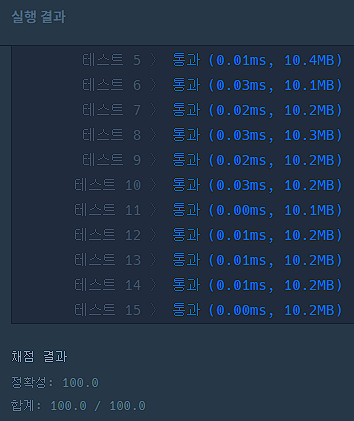

# 3xN 타일링
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/12902)

In [63]:
def solution(n):
    answer = 3
    
    n = n//2
    
    for _ in range(n-1):
        answer = answer * 3 + 2
    
    answer = answer % 1_000_000_007
    
    return answer

In [66]:
solution(4)

11

TypeError: 'str' object does not support item assignment

# 리코챗 로봇
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/169199)

In [1]:
# bfs에 사용할 큐
qu_l = []
# 맵을 저장할 리스트
map_l = []

# 미끄러짐 이동 함수 px, nx, py, ny
def go_px(x,y):
    global map_l
    while True:
        if x == len(map_l)-1: break
        if map_l[x+1][y] == 'D': break
        x += 1
    return x, y

def go_nx(x,y):
    global map_l
    while True:
        if x == 0: break
        if map_l[x-1][y] == 'D': break
        x -= 1
    return x, y

def go_py(x,y):
    global map_l
    while True:
        if y == len(map_l[x])-1: break
        if map_l[x][y+1] == 'D': break
        y += 1
    return x, y

def go_ny(x,y):
    global map_l
    while True:
        if y == 0: break
        if map_l[x][y-1] == 'D': break
        y -= 1
    return x, y

def post_move(_x,_y,x,y) -> bool:
    global qu_l, map_l
    # 이동한 위치가 .이라면, 원래 위치 + 1을 저장
    if map_l[_x][_y] == '.': 
        map_l[_x][_y] = map_l[x][y] + 1
        qu_l.append([_x,_y])
    # 이동한 위치가 G라면, True를 반환하고, 원래 위치 + 1을 저장
    elif map_l[_x][_y] == 'G':
        map_l[_x][_y] = map_l[x][y] + 1
        return True


def solution(board):
    global qu_l, map_l
    
    start = [0, 0]
    
    for i in range(len(board)):
        # 맵을 2차 리스트형식으로 변환
        # 시작점의 좌표를 저장
        board[i] = list(board[i])
        if 'R' in board[i]:
            start[0] = i
            start[1] = board[i].index('R')
    
    map_l = board
    
    # 현재 위치를 큐에 저장
    qu_l.append(start)
    # 현재 위치를 방문했다고 표시
    map_l[start[0]][start[1]] = 0

    while True:
        # print(*map_l, sep='\n')
        # print(qu_l)
        # 큐가 비어있지만 도착점에 도착하지 못했다면, -1을 반환
        if len(qu_l) == 0: return -1

        # 현재 위치를 큐에서 꺼냄
        c_p = qu_l.pop(0)
        
        # 현재 위치에서 네방향 미끄러짐 이동
        # 이동 후 처리는 post_move 함수에서 함
        # post_move 함수는 도착점에 도착했다면 True를 반환
        # 도착점에 도착했다면, 도착점의 값을 반환
        _p = go_px(*c_p)
        if post_move(*_p,*c_p): return map_l[_p[0]][_p[1]]
        _p = go_nx(*c_p)
        if post_move(*_p,*c_p): return map_l[_p[0]][_p[1]]
        _p = go_py(*c_p)
        if post_move(*_p,*c_p): return map_l[_p[0]][_p[1]]
        _p = go_ny(*c_p)
        if post_move(*_p,*c_p): return map_l[_p[0]][_p[1]]
        
    return 


In [41]:

from pprint import pprint

# bfs에 사용할 큐
qu_l = []
# 맵을 저장할 리스트
map_l = []

# 미끄러짐 이동 함수 px, nx, py, ny
def go_px(x,y):
    global map_l
    while True:
        if x == len(map_l)-1: break
        if map_l[x+1][y] == 'D': break
        x += 1
    return x, y

def go_nx(x,y):
    global map_l
    while True:
        if x == 0: break
        if map_l[x-1][y] == 'D': break
        x -= 1
    return x, y

def go_py(x,y):
    global map_l
    while True:
        if y == len(map_l[x])-1: break
        if map_l[x][y+1] == 'D': break
        y += 1
    return x, y

def go_ny(x,y):
    global map_l
    while True:
        if y == 0: break
        if map_l[x][y-1] == 'D': break
        y -= 1
    return x, y

def post_move(_x,_y,x,y) -> bool:
    print_map_l()
    global qu_l, map_l
    # 이동한 위치가 .이라면, 원래 위치 + 1을 저장
    if map_l[_x][_y] == '.': 
        map_l[_x][_y] = map_l[x][y] + 1
        # 큐에 이동한 위치를 저장
        qu_l.append([_x,_y])
    # 이동한 위치가 G라면, True를 반환하고, 원래 위치 + 1을 저장
    elif map_l[_x][_y] == 'G':
        map_l[_x][_y] = map_l[x][y] + 1
        return True

def print_map_l():
    print('=' * 10)
    for i in range(len(map_l)):
        for j in range(len(map_l[i])):
            print(map_l[i][j], end=' ')
        print()
    print(f'Queue : {qu_l}')

def solution(board):
    global qu_l, map_l
    
    map_l = []
    qu_l = []
        
    start = [0, 0]
    
    for i in range(len(board)):
        # 맵을 2차 리스트형식으로 변환
        # 시작점의 좌표를 저장
        board[i] = list(board[i])
        if 'R' in board[i]:
            start[0] = i
            start[1] = board[i].index('R')
    
    map_l = board
    
    print_map_l()
    
    # 현재 위치를 큐에 저장
    qu_l.append(start)
    # 현재 위치를 방문했다고 표시
    map_l[start[0]][start[1]] = 0

    while True:
        print_map_l()
        # 큐가 비어있지만 도착점에 도착하지 못했다면, -1을 반환
        if len(qu_l) == 0: return -1

        # 현재 위치를 큐에서 꺼냄
        c_p = qu_l.pop(0)
        
        # 현재 위치에서 네방향 미끄러짐 이동
        # 이동 후 처리는 post_move 함수에서 함
        # post_move 함수는 도착점에 도착했다면 True를 반환
        # 도착점에 도착했다면, 도착점의 값을 반환
        _p = go_px(*c_p)
        if post_move(*_p,*c_p): return map_l[_p[0]][_p[1]]
        _p = go_nx(*c_p)
        if post_move(*_p,*c_p): return map_l[_p[0]][_p[1]]
        _p = go_py(*c_p)
        if post_move(*_p,*c_p): return map_l[_p[0]][_p[1]]
        _p = go_ny(*c_p)
        if post_move(*_p,*c_p): return map_l[_p[0]][_p[1]]
        
    return 


In [42]:
solution(["...D..R", ".D.G...", "....D.D", "D....D.", "..D...."])

. . . D . . R 
. D . G . . . 
. . . . D . D 
D . . . . D . 
. . D . . . . 
Queue : []
. . . D . . 0 
. D . G . . . 
. . . . D . D 
D . . . . D . 
. . D . . . . 
Queue : [[0, 6]]
. . . D . . 0 
. D . G . . . 
. . . . D . D 
D . . . . D . 
. . D . . . . 
Queue : []
. . . D . . 0 
. D . G . . 1 
. . . . D . D 
D . . . . D . 
. . D . . . . 
Queue : [[1, 6]]
. . . D . . 0 
. D . G . . 1 
. . . . D . D 
D . . . . D . 
. . D . . . . 
Queue : [[1, 6]]
. . . D . . 0 
. D . G . . 1 
. . . . D . D 
D . . . . D . 
. . D . . . . 
Queue : [[1, 6]]
. . . D 1 . 0 
. D . G . . 1 
. . . . D . D 
D . . . . D . 
. . D . . . . 
Queue : [[1, 6], [0, 4]]
. . . D 1 . 0 
. D . G . . 1 
. . . . D . D 
D . . . . D . 
. . D . . . . 
Queue : [[0, 4]]
. . . D 1 . 0 
. D . G . . 1 
. . . . D . D 
D . . . . D . 
. . D . . . . 
Queue : [[0, 4]]
. . . D 1 . 0 
. D . G . . 1 
. . . . D . D 
D . . . . D . 
. . D . . . . 
Queue : [[0, 4]]
. . . D 1 . 0 
. D . G . . 1 
. . . . D . D 
D . . . . D . 
. . D . . . . 
Queue : [

7

In [43]:
solution([".R.", "D..", "D.G"])

. R . 
D . . 
D . G 
Queue : []
. 0 . 
D . . 
D . G 
Queue : [[0, 1]]
. 0 . 
D . . 
D . G 
Queue : []
. 0 . 
D . . 
D 1 G 
Queue : [[2, 1]]
. 0 . 
D . . 
D 1 G 
Queue : [[2, 1]]
. 0 1 
D . . 
D 1 G 
Queue : [[2, 1], [0, 2]]
1 0 1 
D . . 
D 1 G 
Queue : [[2, 1], [0, 2], [0, 0]]
1 0 1 
D . . 
D 1 G 
Queue : [[0, 2], [0, 0]]
1 0 1 
D . . 
D 1 G 
Queue : [[0, 2], [0, 0]]
1 0 1 
D . . 
D 1 G 
Queue : [[0, 2], [0, 0]]


2

In [44]:
solution([".D.R", "....", ".G..", "...D"])

. D . R 
. . . . 
. G . . 
. . . D 
Queue : []
. D . 0 
. . . . 
. G . . 
. . . D 
Queue : [[0, 3]]
. D . 0 
. . . . 
. G . . 
. . . D 
Queue : []
. D . 0 
. . . . 
. G . 1 
. . . D 
Queue : [[2, 3]]
. D . 0 
. . . . 
. G . 1 
. . . D 
Queue : [[2, 3]]
. D . 0 
. . . . 
. G . 1 
. . . D 
Queue : [[2, 3]]
. D 1 0 
. . . . 
. G . 1 
. . . D 
Queue : [[2, 3], [0, 2]]
. D 1 0 
. . . . 
. G . 1 
. . . D 
Queue : [[0, 2]]
. D 1 0 
. . . . 
. G . 1 
. . . D 
Queue : [[0, 2]]
. D 1 0 
. . . . 
. G . 1 
. . . D 
Queue : [[0, 2]]
. D 1 0 
. . . . 
. G . 1 
. . . D 
Queue : [[0, 2]]
. D 1 0 
. . . . 
2 G . 1 
. . . D 
Queue : [[0, 2], [2, 0]]
. D 1 0 
. . . . 
2 G . 1 
. . . D 
Queue : [[2, 0]]
. D 1 0 
. . . . 
2 G . 1 
. . 2 D 
Queue : [[2, 0], [3, 2]]
. D 1 0 
. . . . 
2 G . 1 
. . 2 D 
Queue : [[2, 0], [3, 2]]
. D 1 0 
. . . . 
2 G . 1 
. . 2 D 
Queue : [[2, 0], [3, 2]]
. D 1 0 
. . . . 
2 G . 1 
. . 2 D 
Queue : [[2, 0], [3, 2]]
. D 1 0 
. . . . 
2 G . 1 
. . 2 D 
Queue : [[3, 2]]
. D 1 0 
.

-1

# 최고의 집합
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/12938)

In [24]:
def solution(n, s):
    answer = []
    q, r = divmod(s, n)
    
    if q == 0: return [-1]
    
    for _ in range(n):
        answer.append(q)
    for i in range(n-r, n):
        answer[i] += 1
    return answer